In [2]:
"""##記得要使用GPU (編輯 >> 筆記本設定 >> GPU)"""

# 001 將我們的Google Drive連結上Virtual Machine
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# 002 Check the current working directory
!pwd

# Commented out IPython magic to ensure Python compatibility.
# 003 Change the right working directory

%cd '/content/drive/MyDrive/ES2021/FD20211205/Lab10_Image'


/content
/content/drive/MyDrive/ES2021/FD20211205/Lab10_Image


In [5]:
#311 ### 下載open CV 人臉分類器 

# 下載open CV 人臉分類器!!
# 使用特徵檢測+機器學習演算法，從影像中找到人臉
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


--2021-12-05 04:11:56--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2021-12-05 04:11:56 (15.1 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [7]:
!pwd

/content/drive/MyDrive/ES2021/FD20211205/Lab10_Image


In [8]:
# %matplotlib inline
import matplotlib.pyplot as plt
import cv2
cv2.__version__ #版本不斷更新中
import numpy as np

In [9]:
#312 openCV辨識人臉4步驟 

# ****** openCV辨識人臉4步驟 ******
# 1.載入圖片
image = cv2.imread('face31.jpg')
# 2.載入分類器
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# 3.圖片轉灰階
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 4.使用分類器從圖片找到人臉
faces = haar.detectMultiScale(gray) #偵測人臉
# 得到的結果是 臉的左上角座標與寬、高的像素座標(0,0在最左上角)
print("找到臉的數量=",len(faces))
print(faces)

找到臉的數量= 3
[[2208  213  685  685]
 [ 118  198  732  732]
 [1174  211  715  715]]


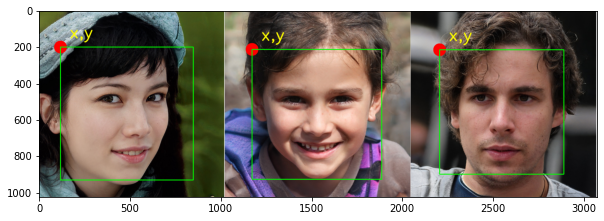

In [10]:
#313 把找到的臉加框
for (x,y,w,h) in faces: #左上角座標x,y與寬w、高h
    #圓形 cv2.circle(影像, 圓心座標, 半徑, 顏色, 線條寬度) 負數代表實心
    cv2.circle(image,(x, y), 35, (0, 0, 255), -1) #紅點標示x,y
    #矩形 cv2.rectangle(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3) #畫矩形框 可改框的顏色/線條粗細
    #文字 cv2.putText(影像, 文字, 座標, 字型, 大小, 顏色, 線條寬度, 線條種類)
    cv2.putText(image, ('x,y'), (x+50, y-50), cv2.FONT_HERSHEY_SIMPLEX,
    3, (0, 255, 255), 5, cv2.LINE_AA)
plt.figure(figsize=(10,4)) #設定顯示尺寸
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #BGR to RGB


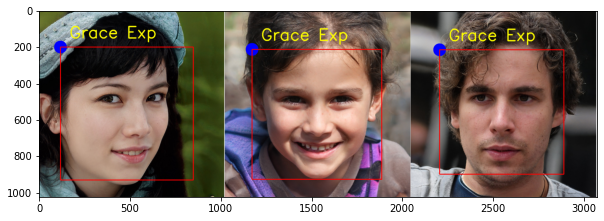

In [11]:
#314 Lab
image = cv2.imread('face31.jpg')

for (x,y,w,h) in faces: #左上角座標x,y與寬w、高h
    #圓形 cv2.circle(影像, 圓心座標, 半徑, 顏色, 線條寬度) 負數代表實心
    cv2.circle(image,(x, y), 35, (255, 0, 0), -1) #紅點標示x,y
    #矩形 cv2.rectangle(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),3) #畫矩形框 可改框的顏色/線條粗細
    #文字 cv2.putText(影像, 文字, 座標, 字型, 大小, 顏色, 線條寬度, 線條種類)
    cv2.putText(image, ('Grace Exp'), (x+50, y-50), cv2.FONT_HERSHEY_SIMPLEX,
    3, (0, 255, 255), 5, cv2.LINE_AA)
plt.figure(figsize=(10,4)) #設定顯示尺寸
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #BGR to RGB


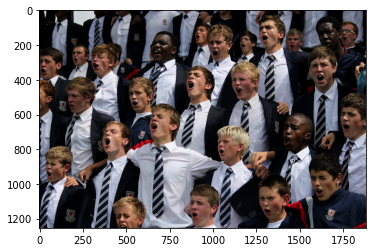

In [12]:
#315 實作練習.找一張圖片有10個以上人臉,
img = cv2.imread("face94.jpg") #("/content/face-filters-.jpg")
#plt.figure(figsize=(4,3))
#plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #BGR to RGB


找到臉的數量: 27


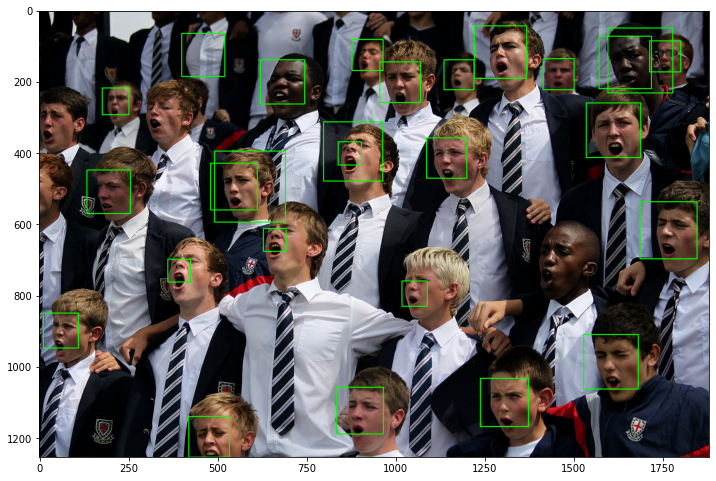

In [13]:
#316 練習.找一張圖片有10個以上人臉,並偵測人臉數量
image = cv2.imread('face94.jpg')
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #載入分類器
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#圖片轉灰階
faces = haar.detectMultiScale(gray) #偵測人臉
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2) #畫矩形框 可改框的顏色/線條粗細
plt.figure(figsize=(12,10)) #設定顯示尺寸
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #BGR to RGB
print('找到臉的數量:',len(faces))



# Lab實作: 試試看使用你自己在網路上找到的團體照, 並且加入你的英文名字

找到臉的數量: 7


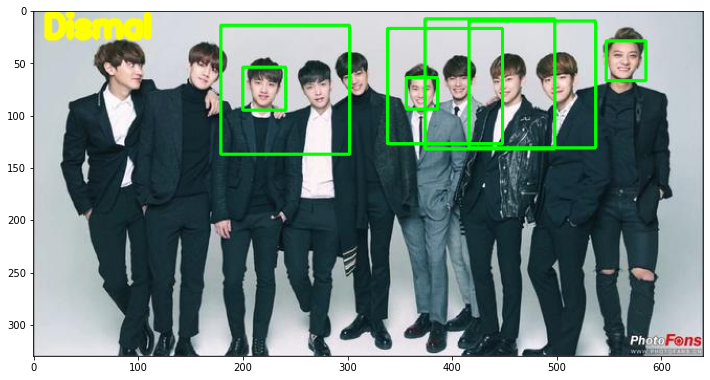

In [20]:
# Your Code
image = cv2.imread('24470007n9n69r1065s2.jpg')
haar = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #載入分類器
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#圖片轉灰階
faces = haar.detectMultiScale(gray) #偵測人臉
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2) #畫矩形框 可改框的顏色/線條粗細
plt.figure(figsize=(12,10)) #設定顯示尺寸
#文字 cv2.putText(影像, 文字, 座標, 字型, 大小, 顏色, 線條寬度, 線條種類)
cv2.putText(image, ('Dismal'), (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 5, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #BGR to RGB
print('找到臉的數量:',len(faces))

     |████████████████████████████████| 100.1 MB 22 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=7e1cc9433599789e6abb1f239472f83f503e12862d74ebbf175b01e3335477fb
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
找到臉的數量= 26


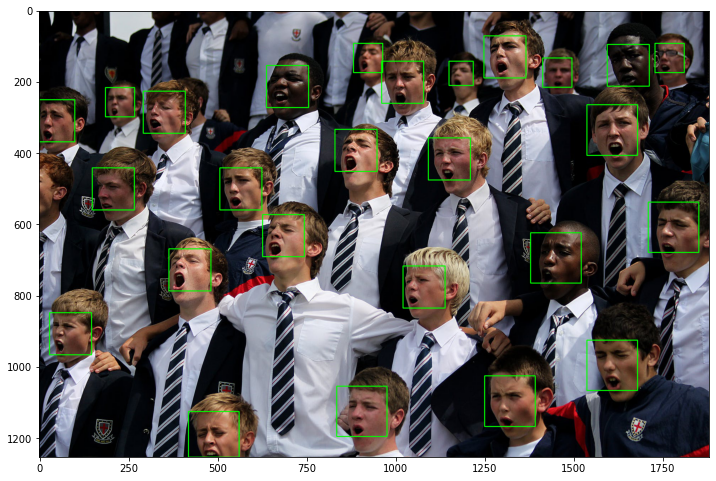

In [21]:
#321 face_recognition 是python第三方模組，基於深度學習的人臉辨識功能
!pip install face_recognition #安裝模組

#322 Commented out IPython magic to ensure Python compatibility.

import cv2
import face_recognition
# %matplotlib inline
import matplotlib.pyplot as plt
image = face_recognition.load_image_file("face94.jpg") #92
faces = face_recognition.face_locations(image,model='cnn')
print("找到臉的數量=",len(faces))
for (top, right, bottom, left) in faces: #畫矩形框 可改框的顏色/線條粗細
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
plt.figure(figsize=(12,10))
#plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(image)

# Lab實作: 試試看使用你自己在網路上找到的團體照, 並且加入你的英文名字

找到臉的數量= 2


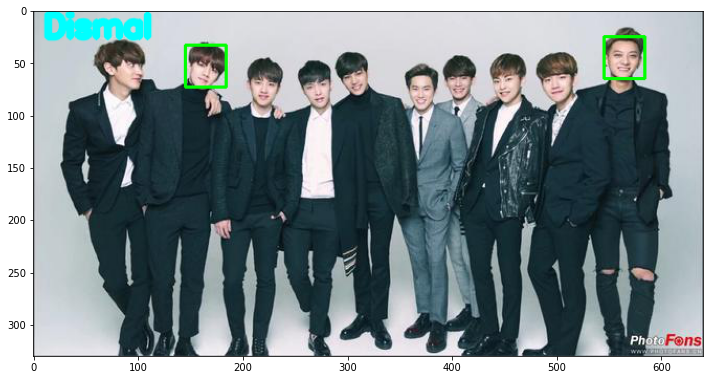

In [29]:
# Your Code
image = face_recognition.load_image_file("24470007n9n69r1065s2.jpg") #92
faces = face_recognition.face_locations(image,model='cnn')
print("找到臉的數量=",len(faces))
for (top, right, bottom, left) in faces: #畫矩形框 可改框的顏色/線條粗細
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
plt.figure(figsize=(12,10))
cv2.putText(image, ('Dismal'), (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 5, cv2.LINE_AA)
plt.imshow(image)

找到臉的數量= 6


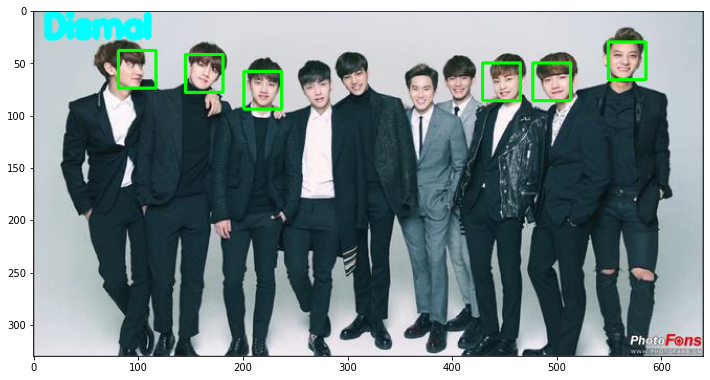

In [30]:
# Your Code
image = face_recognition.load_image_file("24470007n9n69r1065s2.jpg") #92
faces = face_recognition.face_locations(image)
print("找到臉的數量=",len(faces))
for (top, right, bottom, left) in faces: #畫矩形框 可改框的顏色/線條粗細
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
plt.figure(figsize=(12,10))
cv2.putText(image, ('Dismal'), (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 5, cv2.LINE_AA)
plt.imshow(image)